# *Predicting Home Price using various factors*

#### Our Goal is to find information or data about the factors that affect the prices of homes in the United States and knowing how these factors have influenced home prices over the past 20 years (2000 - 2020).

In [1]:
import os
os.getcwd()

'C:\\Users\\pavan'

In [2]:
# Changing the directory where all the downloaded data is present

os.chdir("C:/Users/pavan/HomeProjectFiles")

In [3]:
# Setting up the target variable which is "Home Price Index(HPI)".
# This was taken from "S&P Case-Schiller Home Price Index" : fred.stlouisfed.org/series/CSUSHPISA

import pandas as pd

# Using Pandas, read the HPI csv file and rename with the relevant names

y_monthly = pd.read_csv("Home_Price_Index.csv", parse_dates=True, 
                        index_col=0).rename(columns={'DATE':'Period', 'CSUSHPISA':'HPI'})

In [4]:
y_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2000-01-01 to 2020-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HPI     250 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [5]:
# Rounding the HPI to two decimal digits

y_monthly["HPI"] = y_monthly["HPI"].round(2)

In [6]:
# View the first five rows

y_monthly.head()

,HPI
DATE,
2000-01-01,100.55
2000-02-01,101.34
2000-03-01,102.13
2000-04-01,102.92
2000-05-01,103.68


### Reseached a list of supply and demand factors that typically affect home prices in USA. These include :

####   a. Homes for sale                                       
####   b. Homes sold                                               
####   c. Federal Funds Rate  
####   d. Personal Savings
####   e. Disposable Personal Income
####   f.  Personal Consumption
####   g. Housing Starts
####   f.  Mortgage Rates
####   g. Months of Supply
####   h. Unemployment
####   i.  USA GDP
####   j.  Construction Spending
####   k. Building Permits(Number)
####   l.  Permit Valuation


## *Grabbing "Homes for sale" data*

In [7]:
# Source : U.S. Census Bureau

home_sale = pd.read_csv("Home_for_Sale.csv")[46:68].rename(
            columns = {"Houses For Sale by Region": "Period" , "Unnamed: 1": "Homes for Sale"}).reset_index(drop=True).drop(
            columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'])

In [8]:
home_sale.head()

,Period,Homes for Sale
0,2000,301
1,2001,310
2,2002,344
3,2003,377
4,2004,431


In [9]:
home_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Period          22 non-null     object
 1   Homes for Sale  22 non-null     object
dtypes: object(2)
memory usage: 484.0+ bytes


In [10]:
# Converting the "Period" column to Python's datetime form and "Homes for Sale" column to int

home_sale["Period"] = pd.to_datetime(home_sale['Period'], format='%Y')
home_sale["Homes for Sale"] = home_sale["Homes for Sale"].astype(int)

In [11]:
# Successfully changed the dtypes of columns

home_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Period          22 non-null     datetime64[ns]
 1   Homes for Sale  22 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 396.0 bytes


In [12]:
# Set 'Period' as the index

home_sale.set_index('Period', inplace=True)

# Up-sampling the annual data to Monthly

home_sale = home_sale.resample('MS').mean().round()


In [13]:
# The output shows a few samples of the dataframe which is "upsampled" from Year to Month with NaN values. 

home_sale.head()

,Homes for Sale
Period,
2000-01-01,301.0
2000-02-01,NaN
2000-03-01,NaN
2000-04-01,NaN
2000-05-01,NaN


In [14]:
# fill nan values using a technique called Interpolation. Using 'linear' method to upsample the values of months linearly.

home_sale["Homes for Sale"].interpolate(method='linear', inplace=True)

In [15]:
home_sale.reset_index(inplace=True)

In [16]:
home_sale["Homes for Sale"] = home_sale["Homes for Sale"].astype(int)

In [17]:
home_sale.drop(home_sale.tail(3).index,inplace = True)

In [18]:
# Sample of interpolated values 

home_sale.head(10)

,Period,Homes for Sale
0,2000-01-01,301
1,2000-02-01,301
2,2000-03-01,302
3,2000-04-01,303
4,2000-05-01,304
5,2000-06-01,304
6,2000-07-01,305
7,2000-08-01,306
8,2000-09-01,307
9,2000-10-01,307


## *"Homes sold" data*

In [19]:
homes_sold = pd.read_csv("homes_sold.csv")[45:67].rename(columns = 
                                                         {"Houses Sold by Region": "Period" , "Unnamed: 1": "Homes Sold"}
                                                        ).reset_index(drop=True).drop(columns=[
                                                                    'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'])

In [20]:
homes_sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Period      22 non-null     object
 1   Homes Sold  22 non-null     object
dtypes: object(2)
memory usage: 484.0+ bytes


In [21]:
# Converting Period column to Python datetime form

homes_sold["Period"] = pd.to_datetime(homes_sold['Period'], format='%Y')

# Converting "Homes Sold" column to int 

homes_sold["Homes Sold"] = homes_sold['Homes Sold'].str.replace(',', '').astype(float).astype(int)

In [22]:
# Set 'Period' as the index

homes_sold.set_index('Period', inplace=True)

# Up-sampling the annual data to Monthly

homes_sold = homes_sold.resample('MS').mean().round()


In [23]:
# fill nan values using a technique called Interpolation. Using 'linear' method to upsample the values of months linearly.

homes_sold["Homes Sold"].interpolate(method='linear', inplace=True)

In [24]:
homes_sold.reset_index(inplace=True)

In [25]:
homes_sold["Homes Sold"] = homes_sold["Homes Sold"].astype(int)

In [26]:
homes_sold.drop(homes_sold.tail(3).index,inplace = True)

In [27]:
homes_sold.head(10)

,Period,Homes Sold
0,2000-01-01,877
1,2000-02-01,879
2,2000-03-01,882
3,2000-04-01,884
4,2000-05-01,887
5,2000-06-01,889
6,2000-07-01,892
7,2000-08-01,895
8,2000-09-01,897
9,2000-10-01,900


## *Federal Funds Rate*

In [28]:
# Source :  Federal Reserve Economic Data (FRED) database

feds = pd.read_csv("Federal_Funds.csv").rename(columns = {"DATE": "Period", "DFF": "Fed Funds Rate"})

In [29]:
feds.head(3)

,Period,Fed Funds Rate
0,2000-01-01,3.99
1,2000-01-02,3.99
2,2000-01-03,5.43


In [30]:
feds["Period"] = pd.to_datetime(feds["Period"])

In [31]:
feds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Period          7581 non-null   datetime64[ns]
 1   Fed Funds Rate  7581 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.6 KB


In [32]:
# Set 'Period' as the index

feds.set_index('Period', inplace=True)

# Upsampling 

feds = feds.resample('MS').mean()


In [33]:
# Interpolation 

feds["Fed Funds Rate"].interpolate(method='linear', inplace=True)

In [34]:
feds.reset_index(inplace=True)

In [35]:
feds["Fed Funds Rate"] = feds["Fed Funds Rate"].round(2)

In [36]:
feds.head(10)

,Period,Fed Funds Rate
0,2000-01-01,5.45
1,2000-02-01,5.73
2,2000-03-01,5.85
3,2000-04-01,6.02
4,2000-05-01,6.27
5,2000-06-01,6.53
6,2000-07-01,6.54
7,2000-08-01,6.50
8,2000-09-01,6.52
9,2000-10-01,6.51


## *Personal Savings*

In [37]:
# Source :  Federal Reserve Economic Data (FRED) database

savings = pd.read_csv("Savings.csv").rename(columns = {"DATE": "Period", "PMSAVE": "Savings"})

In [38]:
savings['Period'] = pd.to_datetime(savings['Period'])

In [39]:
savings.head(10)

,Period,Savings
0,2000-01-01,358.9
1,2000-02-01,324.3
2,2000-03-01,311.8
3,2000-04-01,347.8
4,2000-05-01,351.1
5,2000-06-01,355.3
6,2000-07-01,383.8
7,2000-08-01,389.9
8,2000-09-01,340.8
9,2000-10-01,360.3


## *Disposable income*

In [40]:
# Source :  Federal Reserve Economic Data (FRED) database

income = pd.read_csv("Personal_Income.csv").rename(columns = {"DATE": "Period", "DSPIC96": "Personal Income"})

In [41]:
income['Period'] = pd.to_datetime(income['Period'])

In [42]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Period           250 non-null    datetime64[ns]
 1   Personal Income  250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [43]:
income.head(10)

,Period,Personal Income
0,2000-01-01,9309.1
1,2000-02-01,9345.2
2,2000-03-01,9370.3
3,2000-04-01,9418.3
4,2000-05-01,9457.3
5,2000-06-01,9483.3
6,2000-07-01,9533.3
7,2000-08-01,9591.5
8,2000-09-01,9601.5
9,2000-10-01,9627.4


## *Personal Consumption*

In [44]:
# Source :  Federal Reserve Economic Data (FRED) database

pc = pd.read_csv("Personal_Consumption.csv").rename(columns = {"DATE": "Period", "PCE": "Personal Consumption"})

In [45]:
pc["Period"] = pd.to_datetime(pc["Period"])

In [46]:
pc.head(10)

,Period,Personal Consumption
0,2000-01-01,6542.9
1,2000-02-01,6625.3
2,2000-03-01,6686.5
3,2000-04-01,6679.1
4,2000-05-01,6709.7
5,2000-06-01,6746.9
6,2000-07-01,6768.5
7,2000-08-01,6802.8
8,2000-09-01,6888.6
9,2000-10-01,6893.8


## *Housing Starts*

In [47]:
# Source : U.S. Census Bureau

housing_starts = pd.read_csv("housing_starts.csv")[49:71].rename(
                    columns = {
                        "New Privately Owned Housing Units Started": "Period" , "Unnamed: 1": "Housing_Starts"
                              }).reset_index(drop=True).drop(
                    columns=[
                        'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
                        'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'

                    ])

In [48]:
housing_starts.head()

,Period,Housing_Starts
0,2000,"1,568.7"
1,2001,"1,602.7"
2,2002,"1,704.9"
3,2003,"1,847.7"
4,2004,"1,955.8"


In [49]:
housing_starts["Period"] = pd.to_datetime(housing_starts['Period'])

In [50]:
housing_starts['Housing_Starts'] = housing_starts['Housing_Starts'].str.replace(',', '').astype(float).astype(int)


In [51]:
housing_starts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Period          22 non-null     datetime64[ns]
 1   Housing_Starts  22 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 396.0 bytes


In [52]:
housing_starts.set_index('Period', inplace=True)


housing_starts = housing_starts.resample('MS').mean()

In [53]:
housing_starts["Housing_Starts"].interpolate(method='linear', inplace=True)

In [54]:
housing_starts.reset_index(inplace=True)

In [55]:
housing_starts.drop(housing_starts.tail(3).index,inplace = True)

In [56]:
housing_starts["Housing_Starts"] = housing_starts["Housing_Starts"].astype(int)

In [57]:
housing_starts.head(10)

,Period,Housing_Starts
0,2000-01-01,1568
1,2000-02-01,1570
2,2000-03-01,1573
3,2000-04-01,1576
4,2000-05-01,1579
5,2000-06-01,1582
6,2000-07-01,1585
7,2000-08-01,1587
8,2000-09-01,1590
9,2000-10-01,1593


## *Mortgage rate*

In [58]:
# Source :  Federal Reserve Economic Data (FRED) database

mortgage = pd.read_csv('mortgage.csv').rename(columns={'DATE':'Period', 'MORTGAGE30US':'Mortgage'})

In [59]:
mortgage["Period"] = pd.to_datetime(mortgage["Period"])

In [60]:
mortgage["Mortgage"] = mortgage["Mortgage"].round(2)

In [61]:
mortgage.head(10)

,Period,Mortgage
0,2000-01-01,8.21
1,2000-02-01,8.32
2,2000-03-01,8.24
3,2000-04-01,8.15
4,2000-05-01,8.52
5,2000-06-01,8.29
6,2000-07-01,8.15
7,2000-08-01,8.03
8,2000-09-01,7.91
9,2000-10-01,7.80


## *Months of supply*

In [62]:
# Source :  Federal Reserve Economic Data (FRED) database

mos = pd.read_csv('Months_of_Supply.csv').rename(columns={'DATE':'Period', 'MSACSR':'Months of Supply'})

In [63]:
mos["Period"] = pd.to_datetime(mos["Period"])

In [64]:
mos.head(10)

,Period,Months of Supply
0,2000-01-01,4.3
1,2000-02-01,4.3
2,2000-03-01,4.3
3,2000-04-01,4.4
4,2000-05-01,4.4
5,2000-06-01,4.8
6,2000-07-01,4.1
7,2000-08-01,4.4
8,2000-09-01,4.0
9,2000-10-01,4.0


## *Unemployment*

In [65]:
# Source :  Federal Reserve Economic Data (FRED) database

unemp = pd.read_csv('unemp.csv').rename(columns={'DATE':'Period', 'UNRATE':'Unemployment'})

In [66]:
unemp["Period"] = pd.to_datetime(unemp["Period"])

In [67]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Period        250 non-null    datetime64[ns]
 1   Unemployment  250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [68]:
unemp.head(10)

,Period,Unemployment
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
5,2000-06-01,4.0
6,2000-07-01,4.0
7,2000-08-01,4.1
8,2000-09-01,3.9
9,2000-10-01,3.9


## *USA GDP monthly*

In [69]:
# Source :  Federal Reserve Economic Data (FRED) database

gdp = pd.read_csv("GDP_Monthly.csv").rename(columns={'DATE': 'Period', 'USALORSGPNOSTSAM':'USA_GDP'})

In [70]:
gdp["Period"] = pd.to_datetime(gdp["Period"])

In [71]:
gdp["USA_GDP"] = round(gdp["USA_GDP"], 2)

In [72]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Period   250 non-null    datetime64[ns]
 1   USA_GDP  250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [73]:
gdp.head(10)

,Period,USA_GDP
0,2000-01-01,101.52
1,2000-02-01,101.58
2,2000-03-01,101.66
3,2000-04-01,101.73
4,2000-05-01,101.77
5,2000-06-01,101.76
6,2000-07-01,101.71
7,2000-08-01,101.62
8,2000-09-01,101.50
9,2000-10-01,101.36


## *Construction Spending*

In [74]:
cons = pd.read_csv("Total_Construction.csv").rename(columns={'DATE': 'Period', 'TTLCONS':'Total_Construction'})

In [75]:
cons['Period'] = pd.to_datetime(cons['Period'])
cons['Total_Construction'] = cons['Total_Construction'].astype(int)

In [76]:
cons.head(10)

,Period,Total_Construction
0,2000-01-01,784940
1,2000-02-01,793737
2,2000-03-01,809459
3,2000-04-01,804766
4,2000-05-01,805005
5,2000-06-01,795411
6,2000-07-01,783795
7,2000-08-01,805341
8,2000-09-01,814330
9,2000-10-01,816100


## *Building Permits*

In [77]:
pm = pd.read_csv('permits_number.csv')[488:738].rename(
            columns = {"New Privately Owned Housing Units Authorized by Building Permits in Permit-Issuing Places": "Period" , 
                       "Unnamed: 2": "Permits_Number"}).reset_index(drop=True).drop(
            columns=['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
                    'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
                    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])

In [78]:
# Converting Period column to Python datetime form

pm["Period"] = pd.to_datetime(pm['Period'], format='mixed')

# Converting "Permits_Number" column to int 

pm["Permits_Number"] = pm['Permits_Number'].str.replace(',', '').astype(float).astype(int)

In [79]:
pm.head(10)

,Period,Permits_Number
0,2000-01-01,1727
1,2000-02-01,1692
2,2000-03-01,1651
3,2000-04-01,1597
4,2000-05-01,1543
5,2000-06-01,1572
6,2000-07-01,1542
7,2000-08-01,1552
8,2000-09-01,1570
9,2000-10-01,1577


## *Permit Valuation*

In [80]:
pv = pd.read_csv('permits_valuation.csv')[149:399].rename(
            columns = {"Unnamed: 1": "Period" , 
                       "Unnamed: 2": "Permits_Valuation"}).reset_index(drop=True).drop(
            columns=['New Privately Owned Housing Units Authorized by Building Permits in Permit-Issuing Places', 
                     'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
                    'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
                    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'])

In [81]:
pv["Period"] = pd.to_datetime(pv['Period'], format='mixed')

pv["Permits_Valuation"] = pv['Permits_Valuation'].str.replace(',', '').astype(float)

In [82]:
pv.head()

,Period,Permits_Valuation
0,2000-01-01,11753.4
1,2000-02-01,13301.5
2,2000-03-01,17325.8
3,2000-04-01,16060.1
4,2000-05-01,17428.2


#####  We have all the factors available in the form of csv files. 
##### Now let's merge all these files and create one large monthly file consisting of all the factors as shown below 

In [83]:
dfs = [gdp, unemp, mos, cons, pm, pv, mortgage, housing_starts, pc, income, savings, feds, homes_sold, home_sale]

In [84]:
# Merge dataframes using outer join on the 'Period' column

x_monthly = pd.merge(dfs[0], dfs[1], how='outer', on='Period')

In [85]:
for df in dfs[2:]:
    x_monthly = pd.merge(x_monthly, df, how='outer', on='Period')

In [86]:
x_monthly.set_index('Period', inplace=True)

In [87]:
x_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2000-01-01 to 2020-10-01
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   USA_GDP               250 non-null    float64
 1   Unemployment          250 non-null    float64
 2   Months of Supply      250 non-null    float64
 3   Total_Construction    250 non-null    int32  
 4   Permits_Number        250 non-null    int32  
 5   Permits_Valuation     250 non-null    float64
 6   Mortgage              250 non-null    float64
 7   Housing_Starts        250 non-null    int32  
 8   Personal Consumption  250 non-null    float64
 9   Personal Income       250 non-null    float64
 10  Savings               250 non-null    float64
 11  Fed Funds Rate        250 non-null    float64
 12  Homes Sold            250 non-null    int32  
 13  Homes for Sale        250 non-null    int32  
dtypes: float64(9), int32(5)
memory usage: 24.4 KB


In [88]:
y_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2000-01-01 to 2020-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HPI     250 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [89]:
print(x_monthly.dtypes)
print('\n')
print(y_monthly.dtypes)

USA_GDP                 float64
Unemployment            float64
Months of Supply        float64
Total_Construction        int32
Permits_Number            int32
Permits_Valuation       float64
Mortgage                float64
Housing_Starts            int32
Personal Consumption    float64
Personal Income         float64
Savings                 float64
Fed Funds Rate          float64
Homes Sold                int32
Homes for Sale            int32
dtype: object


HPI    float64
dtype: object


### *Now let's build a Machine Learning(ML) model that explains how these factors impacted home prices over the last 20 years*

In [90]:
from sklearn.model_selection import train_test_split # Import the train_test_split function from scikit-learn for data splitting.
from sklearn.linear_model import LinearRegression  # Import the LinearRegression model from scikit-learn.
from sklearn import metrics # Import the metrics module from scikit-learn for evaluating model performance.

In [91]:
# Creating x feature variable containing specific columns from the 'x_monthly'.

x = x_monthly[['USA_GDP', 'Unemployment', 'Months of Supply', 'Total_Construction', 
               'Permits_Number', 'Permits_Valuation', 'Mortgage', 'Housing_Starts', 
               'Personal Consumption', 'Personal Income', 'Savings', 'Fed Funds Rate', 
               'Homes Sold', 'Homes for Sale']]

In [92]:
x.head(10)

,USA_GDP,Unemployment,Months of Supply,Total_Construction,Permits_Number,Permits_Valuation,Mortgage,Housing_Starts,Personal Consumption,Personal Income,Savings,Fed Funds Rate,Homes Sold,Homes for Sale
Period,,,,,,,,,,,,,,
2000-01-01,101.52,4.0,4.3,784940,1727,11753.4,8.21,1568,6542.9,9309.1,358.9,5.45,877,301
2000-02-01,101.58,4.1,4.3,793737,1692,13301.5,8.32,1570,6625.3,9345.2,324.3,5.73,879,301
2000-03-01,101.66,4.0,4.3,809459,1651,17325.8,8.24,1573,6686.5,9370.3,311.8,5.85,882,302
2000-04-01,101.73,3.8,4.4,804766,1597,16060.1,8.15,1576,6679.1,9418.3,347.8,6.02,884,303
2000-05-01,101.77,4.0,4.4,805005,1543,17428.2,8.52,1579,6709.7,9457.3,351.1,6.27,887,304
2000-06-01,101.76,4.0,4.8,795411,1572,17818.5,8.29,1582,6746.9,9483.3,355.3,6.53,889,304
2000-07-01,101.71,4.0,4.1,783795,1542,15181.9,8.15,1585,6768.5,9533.3,383.8,6.54,892,305
2000-08-01,101.62,4.1,4.4,805341,1552,17293.3,8.03,1587,6802.8,9591.5,389.9,6.50,895,306
2000-09-01,101.50,3.9,4.0,814330,1570,15073.9,7.91,1590,6888.6,9601.5,340.8,6.52,897,307


In [93]:
# 'y' Represents target variable for modeling

y = y_monthly[['HPI']]

In [94]:
y.head(3)

,HPI
DATE,
2000-01-01,100.55
2000-02-01,101.34
2000-03-01,102.13


In [95]:
# Split the feature data 'x' and target variable 'y' into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False, stratify=None)

In [96]:
# Creating Linear Regression model instance

model = LinearRegression()

In [97]:
# Train the model using corresponding feature and target values

model.fit(X_train, y_train)

LinearRegression()

In [98]:
# Make predictions on the test data 'X_test'

y_predict = model.predict(X_test)

In [99]:
y_predict[0:3]

array([[165.38715941],
       [165.48535224],
       [166.89876613]])

In [100]:
#  Finding out the relationship between each feature and the target variable.

print(model.coef_)

[[-1.45513684e+00  1.45333644e+00  1.21689253e+00  1.39084353e-05
   6.61998783e-03  5.25931451e-05  7.32080321e-01  5.20226433e-03
   8.50379674e-03  7.96274564e-03 -1.33319422e-02  4.64518477e-01
  -3.26916548e-02  1.68168783e-01]]


In [101]:
# Printing estimated values(intercepts) when all features are zero

print(model.intercept_)

[51.13669871]


In [102]:
print(model.score(X_train, y_train))

0.9964283254544176


In [103]:
print(model.score(X_test, y_test))

0.750556023738618


##### **To assess the performance of the model, below evaluation metrics can be used**

In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 5.4747252744833945


In [105]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))

Mean Squared Error: 74.93805972026584


In [106]:
import numpy as np

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 8.65667717546784


In [107]:
print(y_test.describe())

              HPI
count   75.000000
mean   193.426133
std     17.449359
min    165.220000
25%    177.910000
50%    193.770000
75%    207.265000
max    229.890000


### Observations :
#### ***The Root Mean Squared error is less than 10% of the mean value of HPI, and lesser than the standard deviation of the HPI in the test data. This indicates the the model is doing good in predicting values.*** 

In [108]:
# Actual target values from y_test vs predicted values by the model

result = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predict.squeeze()})

In [109]:
result.head(10)

,Actual,Predicted
DATE,,
2014-08-01,165.22,165.387159
2014-09-01,165.91,165.485352
2014-10-01,166.64,166.898766
2014-11-01,167.34,167.483911
2014-12-01,168.05,166.879945
2015-01-01,168.63,166.264132
2015-02-01,169.13,166.814136
2015-03-01,169.80,168.560385
2015-04-01,170.30,170.194607


### *To check the assumptions and performance of a linear regression model, we can use different types of "Residual Plots".*

In [110]:
# Difference between predicted and actual values

residuals = y_test-y_predict

***Scatterplot of Residuals vs. Predicted Values:***

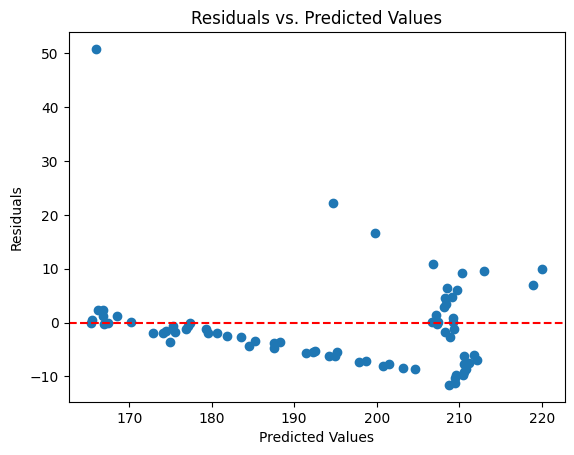

In [111]:
import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.show()

***Histogram or Density Plot of Residuals:***

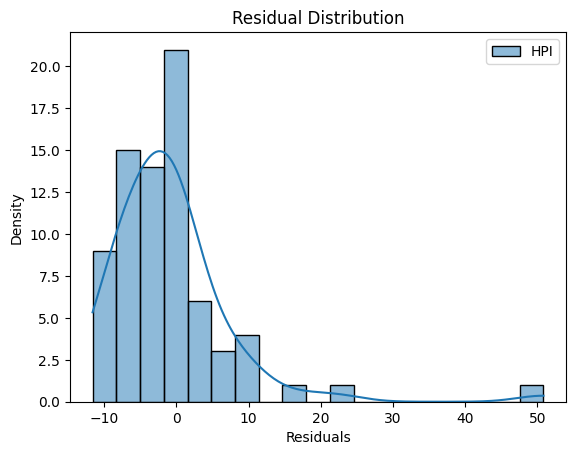

In [112]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residual Distribution")
plt.show()

***QQ Plot (Quantile-Quantile Plot):***

In [113]:
!pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


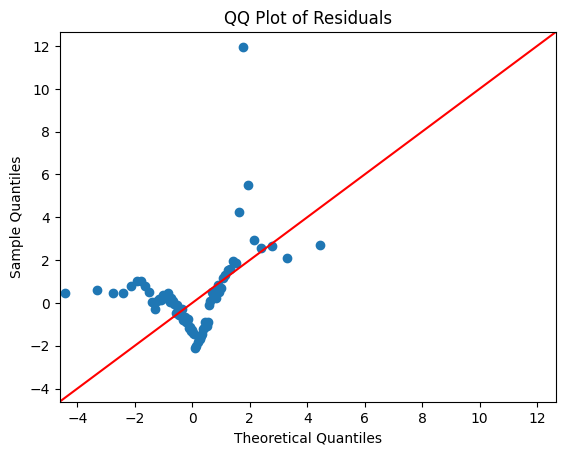

In [114]:
import statsmodels.api as sm
import scipy.stats as stats

sm.qqplot(residuals, stats.t, fit=True, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of Residuals")
plt.show()